In [484]:
# import numpy and pandas packages
import pandas as pd
import numpy as np

In [485]:
# import numpy and pandas packages
import pandas as pd
import numpy as np

In [486]:
#Let’s load the Kaggle dataset into a Pandas data frame
data=pd.read_csv("Bengaluru_House_Data.csv")


In [487]:
#cheack the head of the data set

data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [489]:
data.shape


(13320, 9)

In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [491]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [492]:
for column in data.columns:
    print(data[column].value_counts(ascending=True))
    print("*"*20)

Carpet  Area              87
Plot  Area              2025
Built-up  Area          2418
Super built-up  Area    8790
Name: area_type, dtype: int64
********************
14-Jul               1
16-Jul               1
15-Jun               1
16-Jan               1
15-Dec               1
                 ...  
18-Aug             200
18-Apr             271
18-May             295
18-Dec             307
Ready To Move    10581
Name: availability, Length: 81, dtype: int64
********************
banashankari stage iii sa      1
Medi Agrahara                  1
whitefiled                     1
Subbannaiah Palya              1
N R Layout                     1
                            ... 
Thanisandra                  234
Kanakpura Road               273
Electronic City              302
Sarjapur  Road               399
Whitefield                   540
Name: location, Length: 1305, dtype: int64
********************
18 Bedroom       1
12 Bedroom       1
27 BHK           1
14 BHK           1
43 Bedroom 

# data cleaning

In [493]:
# Checking Null values
data.isna().sum()
# There are no NULL values in the dataset, hence it is clean.

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [494]:
#NOTE: DROP UNNECESSARY FEATURES
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [495]:
#calculation some statistical data like percentile,mean and std of numerical values of data frame
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [496]:
#prints the information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [497]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [498]:
data['location']=data['location'].fillna('Sarjapur.Road')

In [499]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [500]:
data['size']=data['size'].fillna('2 BHK')

In [501]:
data['bath']=data['bath'].fillna(data['bath'].median())

In [502]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


# feature engineering

In [503]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [504]:
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [505]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [506]:

def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [507]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [508]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# ADD NEW FEATURE CALLED PRICE PER SQUARE FEET

# price per square feet

In [509]:
data['price_per_sqft']=data['price'] *100000 / data['total_sqft']

In [510]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [511]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [512]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [513]:
data['location']=data['location'].apply(lambda x:x.strip())
location_count=data['location'].value_counts()

In [514]:
location_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

# DIMENSIONALITY REDUCTIONS

In [515]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [516]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [517]:
data['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

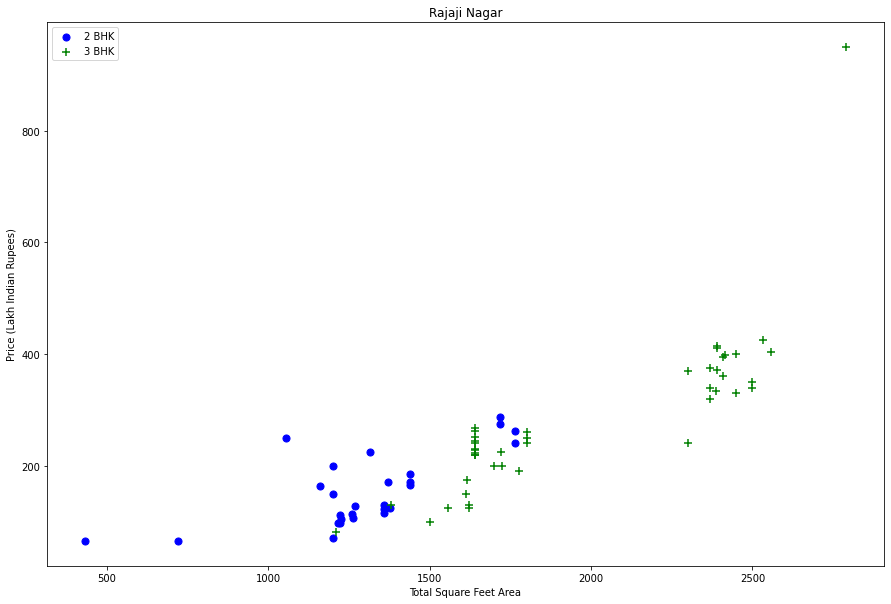

In [518]:
def plot_scatter_chart(df,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Rajaji Nagar")

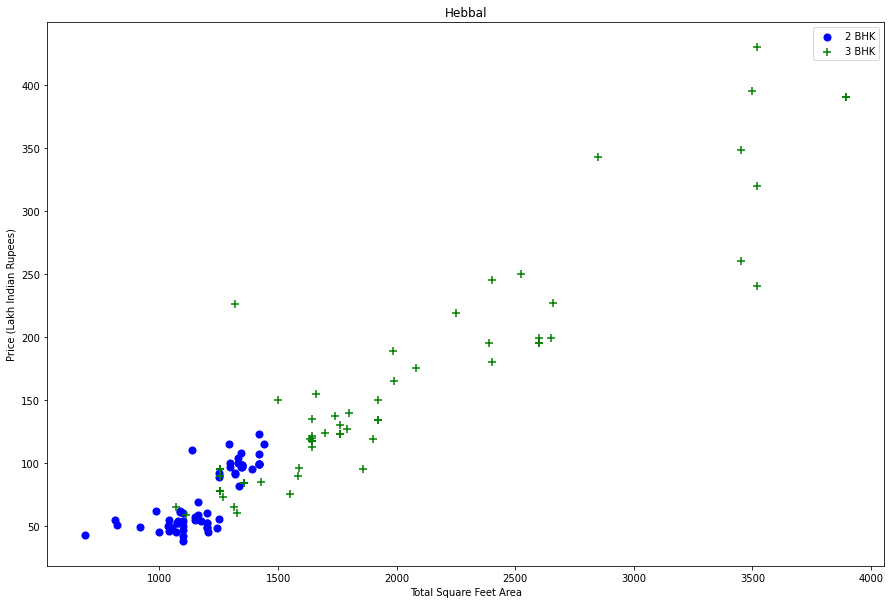

In [519]:
plot_scatter_chart(data,"Hebbal")

# outlier detection and removal

In [520]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


# outlier removal using buisness logic

In [521]:
data=data[((data['total_sqft']/data['bhk'])>=300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [522]:
data.shape

(12530, 7)

In [523]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

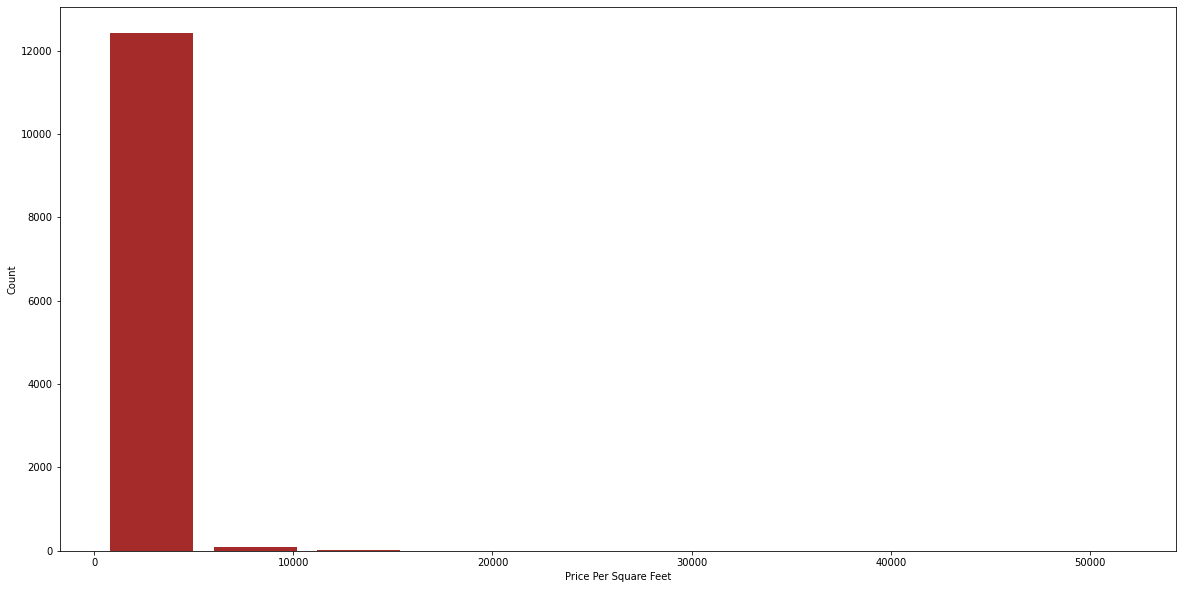

In [524]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data.total_sqft,rwidth=0.8, color = "brown")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [525]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index =True)
    return df_output
data=remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [526]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
                
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')         

In [527]:
data=bhk_outlier_remover(data)

Text(0, 0.5, 'Count')

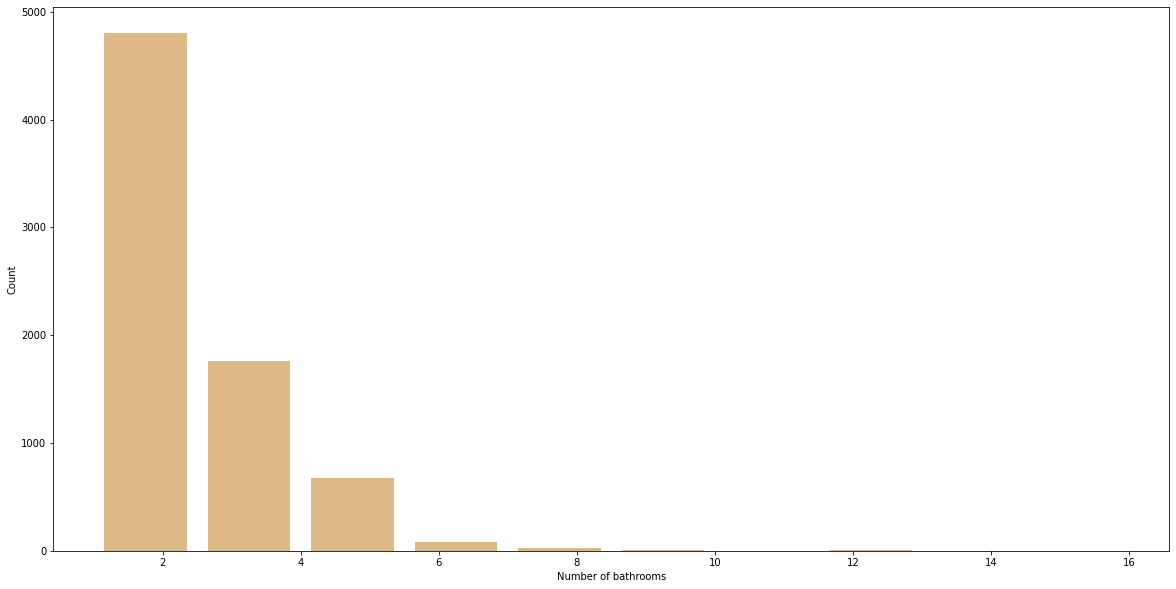

In [528]:
plt.hist(data.bath,rwidth=0.8, color = "burlywood")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [529]:
data.shape

(7361, 7)

In [530]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [531]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

# cleaned data

In [532]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [533]:
data.to_csv("Cleaned_data.csv")

In [534]:
X=data.drop(columns=['price'])
y=data['price']

In [535]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [536]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [537]:
print(X_train.shape)
print(X_test.shape)

(5888, 4)
(1473, 4)


# applying linear regression

In [538]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [539]:
scaler=StandardScaler()

In [540]:
lr=LinearRegression()

In [541]:
pipe=make_pipeline(column_trans,scaler,lr)

In [542]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [543]:
y_pred_lr=pipe.predict(X_test)

In [544]:
r2_score(y_test,y_pred_lr)

0.8233723964139525

# applying lasso

In [545]:
lasso=Lasso()

In [546]:
pipe=make_pipeline(column_trans,scaler,lasso)

In [547]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [548]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.812828565077272

# applying ridge

In [549]:
ridge=Ridge()

In [550]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [551]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [552]:
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8234146633312646

In [553]:
print("LInear:",r2_score(y_test,y_pred_lr))
print("Lasso:",r2_score(y_test,y_pred_lasso))
print("Ridge:",r2_score(y_test,y_pred_ridge))

LInear: 0.8233723964139525
Lasso: 0.812828565077272
Ridge: 0.8234146633312646


In [556]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(data.columns==location)[0][0]

    x = np.zeros(len(data.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 0

    return y_pred_lr.predict([x])[0]

In [653]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.8657025831235

In [654]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284987108

In [655]:
predict_price('Indira Nagar',1000, 3, 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854718

In [656]:
import pickle

In [657]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))